In [2]:
import numpy as np
import pandas as pd 
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.gridspec as grid_spec
import seaborn as sns

In [3]:
df = pd.read_csv('C:/Users/susum/Documents/ds_happiness_proj/world-happiness-report-2021.csv')

In [4]:
df.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [5]:
df.rename(columns={'Country name': 'Country'}, inplace=True)
df.rename(columns={'Regional indicator': 'Region'}, inplace=True)

In [6]:
df.columns

Index(['Country', 'Region', 'Ladder score', 'Standard error of ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

The "Explained by" columns in this dataframe represent the degree to which each of the six factors (i.e., Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, and Perceptions of corruption) contributes to the overall happiness score, as determined by the World Happiness Report. These values are calculated using regression analysis to estimate the contribution of each factor to the happiness score, controlling for the effects of other factors. In other words, the "Explained by" columns show how much of the variation in happiness scores can be explained by each factor, given the other factors in the model. The sum of these values, along with the Dystopia + residual column, should equal the Ladder score column.

In [7]:
df.shape

(149, 20)

In [8]:
df.describe()

,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
count,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,1.490000e+02,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.532839,0.058752,5.648007,5.417631,9.432208,0.814745,64.992799,0.791597,-0.015134,0.727450,2.430000e+00,0.977161,0.793315,0.520161,0.498711,0.178047,0.135141,2.430329
std,1.073924,0.022001,1.054330,1.094879,1.158601,0.114889,6.762043,0.113332,0.150657,0.179226,5.347044e-15,0.404740,0.258871,0.213019,0.137888,0.098270,0.114361,0.537645
min,2.523000,0.026000,2.596000,2.449000,6.635000,0.463000,48.478000,0.382000,-0.288000,0.082000,2.430000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.648000
25%,4.852000,0.043000,4.991000,4.706000,8.541000,0.750000,59.802000,0.718000,-0.126000,0.667000,2.430000e+00,0.666000,0.647000,0.357000,0.409000,0.105000,0.060000,2.138000
50%,5.534000,0.054000,5.625000,5.413000,9.569000,0.832000,66.603000,0.804000,-0.036000,0.781000,2.430000e+00,1.025000,0.832000,0.571000,0.514000,0.164000,0.101000,2.509000
75%,6.255000,0.070000,6.344000,6.128000,10.421000,0.905000,69.600000,0.877000,0.079000,0.845000,2.430000e+00,1.323000,0.996000,0.665000,0.603000,0.239000,0.174000,2.794000
max,7.842000,0.173000,7.904000,7.780000,11.647000,0.983000,76.953000,0.970000,0.542000,0.939000,2.430000e+00,1.751000,1.172000,0.897000,0.716000,0.541000,0.547000,3.482000


Histogram of the number of countries by region

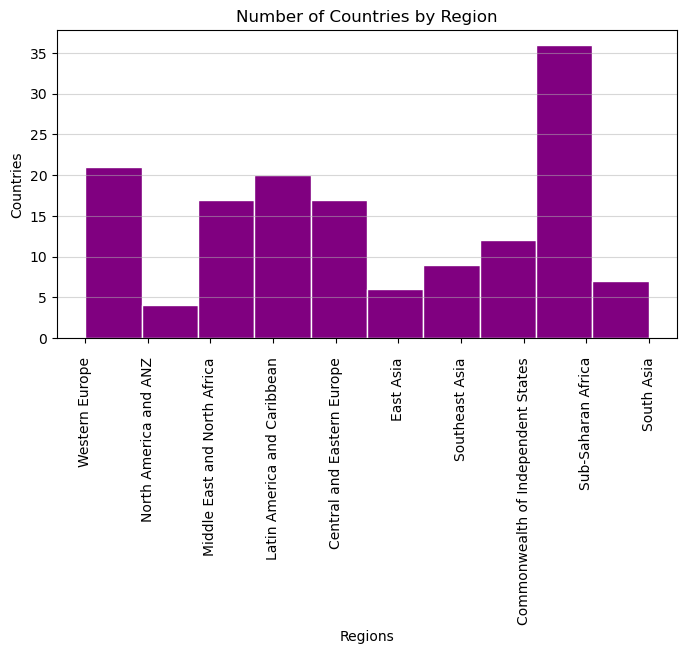

In [9]:
fig, ax = plt.subplots(figsize=(8,4))

plt.hist(df.Region, color='purple', orientation=u'vertical', edgecolor='white')

ax.grid(axis='y', alpha=0.5)

# Customize the x-axis labels
plt.xticks(rotation=90, ha='center')
ax.tick_params(axis='x', which='major', pad=10)

plt.title('Number of Countries by Region')
plt.xlabel('Regions')
plt.ylabel('Countries')

plt.show()

Histogram of the ladder scores

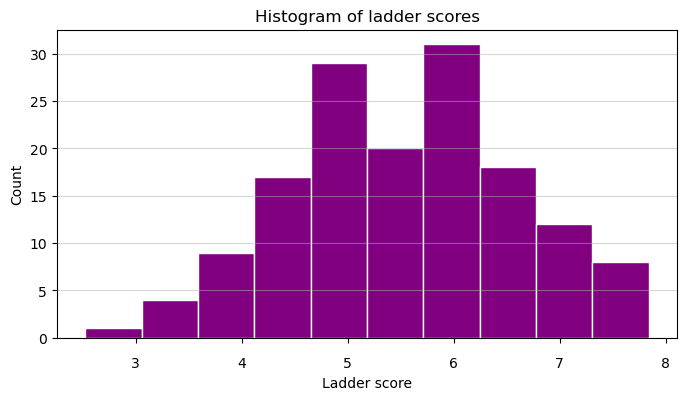

In [10]:
fig, ax = plt.subplots(figsize=(8,4))

plt.hist(df['Ladder score'], color='purple', orientation=u'vertical', edgecolor='white')

ax.grid(axis='y', alpha=0.5)

# Customize the x-axis labels
plt.xticks( ha='center')
ax.tick_params(axis='x', which='major', pad=10)

plt.title('Histogram of ladder scores')
plt.xlabel('Ladder score')
plt.ylabel('Count')

plt.show()

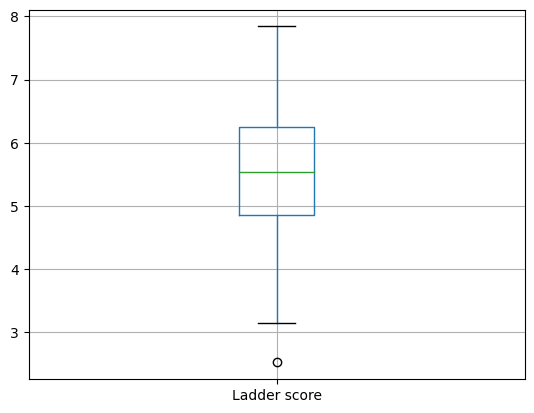

In [11]:
df.boxplot(column=['Ladder score']);

Correlations between key six happiness factors and ladder score

In [12]:
df[['Ladder score','Logged GDP per capita','Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity','Perceptions of corruption']].corr()

,Ladder score,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Ladder score,1.000000,0.789760,0.756888,0.768099,0.607753,-0.017799,-0.421140
Logged GDP per capita,0.789760,1.000000,0.785299,0.859461,0.432323,-0.199286,-0.342337
Social support,0.756888,0.785299,1.000000,0.723256,0.482930,-0.114946,-0.203207
Healthy life expectancy,0.768099,0.859461,0.723256,1.000000,0.461494,-0.161750,-0.364374
Freedom to make life choices,0.607753,0.432323,0.482930,0.461494,1.000000,0.169437,-0.401363
Generosity,-0.017799,-0.199286,-0.114946,-0.161750,0.169437,1.000000,-0.163962
Perceptions of corruption,-0.421140,-0.342337,-0.203207,-0.364374,-0.401363,-0.163962,1.000000


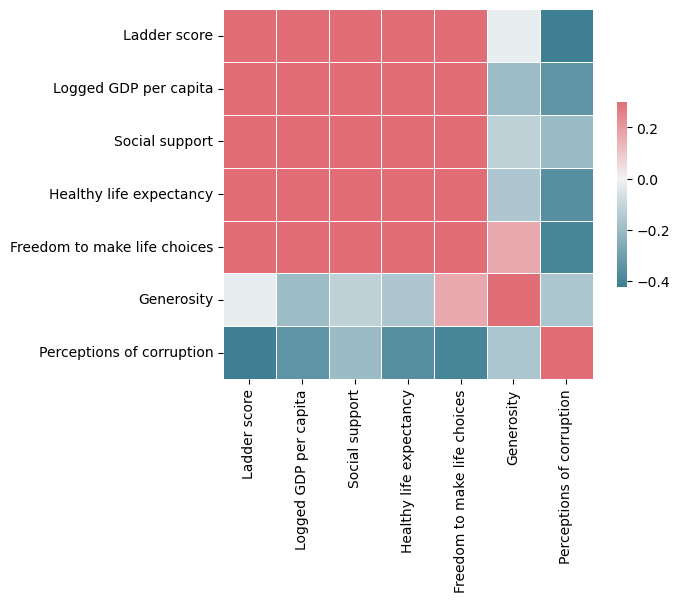

In [13]:
cmap = sns.diverging_palette(220,10,as_cmap=True)
sns.heatmap(df[['Ladder score','Logged GDP per capita','Social support', 'Healthy life expectancy','Freedom to make life choices', 'Generosity','Perceptions of corruption']].corr(),
           vmax= .3, center=0, cmap=cmap, square=True, linewidths= .5, cbar_kws={"shrink":.5});

Regions sorted by ladder score means

In [14]:
my_pivot= pd.pivot_table(df, index= 'Region', values='Ladder score')
pivot_table_sorted = my_pivot.sort_values(by='Ladder score', ascending=False)
pivot_table_sorted

,Ladder score
Region,
North America and ANZ,7.128500
Western Europe,6.914905
Central and Eastern Europe,5.984765
Latin America and Caribbean,5.908050
East Asia,5.810333
Commonwealth of Independent States,5.467000
Southeast Asia,5.407556
Middle East and North Africa,5.219765
Sub-Saharan Africa,4.494472


Regions sorted by GDP per capita

In [15]:
my_pivot= pd.pivot_table(df, index= 'Region', values='Logged GDP per capita')
pivot_table_sorted = my_pivot.sort_values(by='Logged GDP per capita', ascending=False)
pivot_table_sorted

,Logged GDP per capita
Region,
Western Europe,10.822714
North America and ANZ,10.809500
East Asia,10.367667
Central and Eastern Europe,10.109059
Middle East and North Africa,9.666118
Southeast Asia,9.421444
Commonwealth of Independent States,9.401833
Latin America and Caribbean,9.370000
South Asia,8.682571


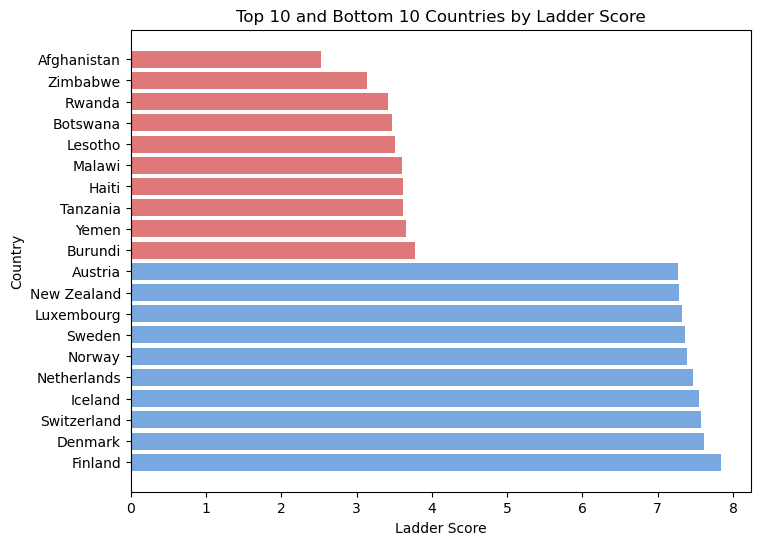

In [16]:
df_sorted = df.sort_values('Ladder score', ascending=False)
top_10 = df_sorted.head(10)
bottom_10 = df_sorted.tail(10)
top_bottom = pd.concat([top_10, bottom_10])
colors = ['#78a8df']*10 + ['#df7878']*10

# Create the bar plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.barh(top_bottom['Country'], top_bottom['Ladder score'], color=colors)
ax.set_title('Top 10 and Bottom 10 Countries by Ladder Score')
ax.set_xlabel('Ladder Score')
ax.set_ylabel('Country')
plt.show()

In [17]:
df_happy_mean= df[df['Ladder score']>= df['Ladder score'].mean()]
df_sad_mean = df[df['Ladder score']<= df['Ladder score'].mean()]

In [18]:
df_map = df[['Country','Ladder score']]
df_map = df_map.reset_index(drop=True)
df_map.head()

,Country,Ladder score
0,Finland,7.842
1,Denmark,7.620
2,Switzerland,7.571
3,Iceland,7.554
4,Netherlands,7.464


Color-coded countries according to their happiness scores on a world map

In [49]:
import geopandas
!pip install folium
import folium

country_geopandas = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
country_geopandas = country_geopandas.merge(df, how='inner', left_on='name', right_on='Country')

m = folium.Map(location=[0, 0], zoom_start=2)
folium.Choropleth(geo_data=country_geopandas,
                  data=df,
                  columns=['Country', 'Ladder score'],
                  key_on='feature.properties.name',
                  fill_color='YlOrRd',
                  legend_name='Happiness Score').add_to(m)

m

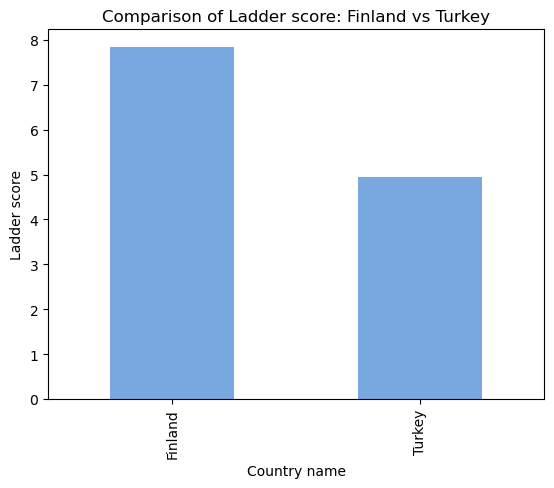

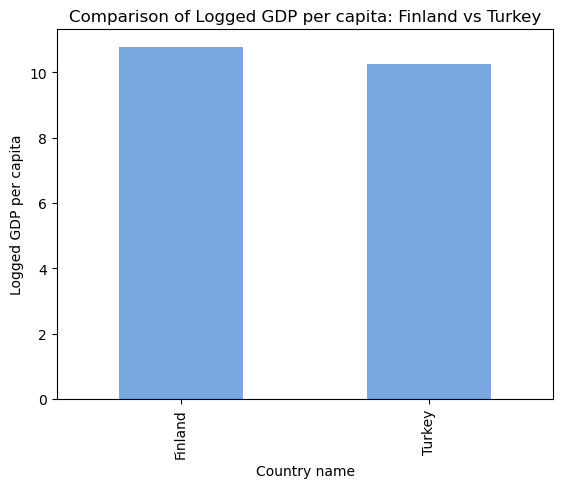

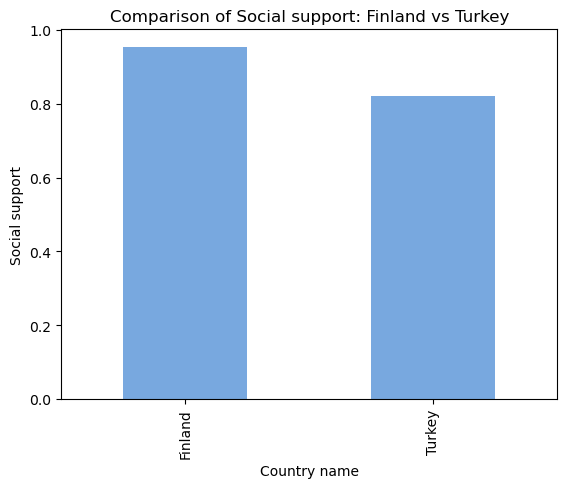

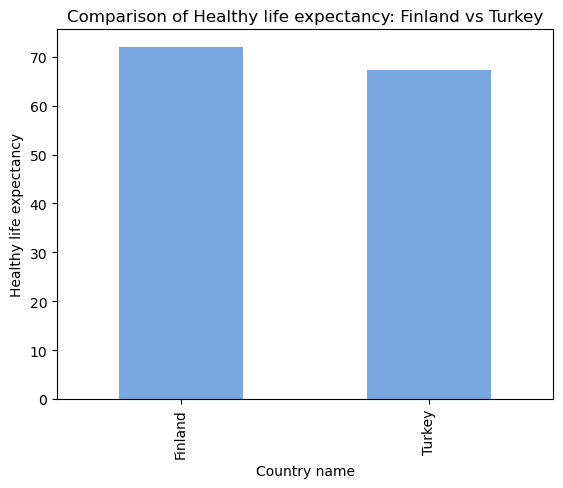

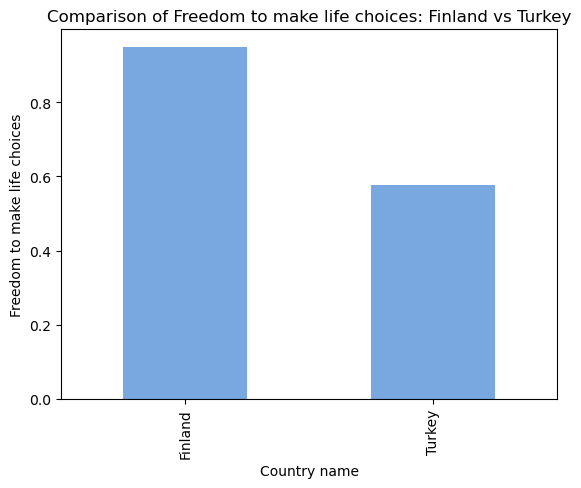

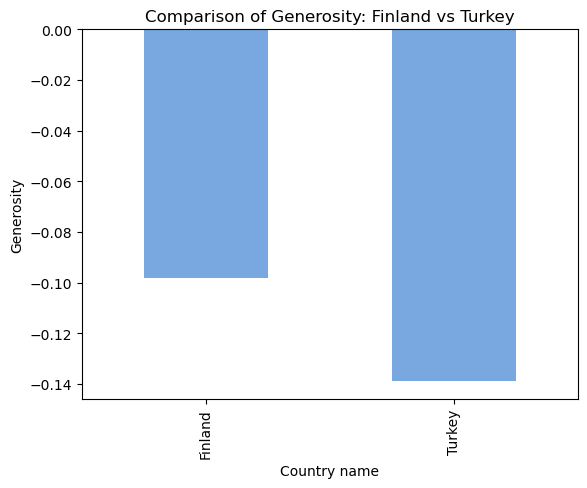

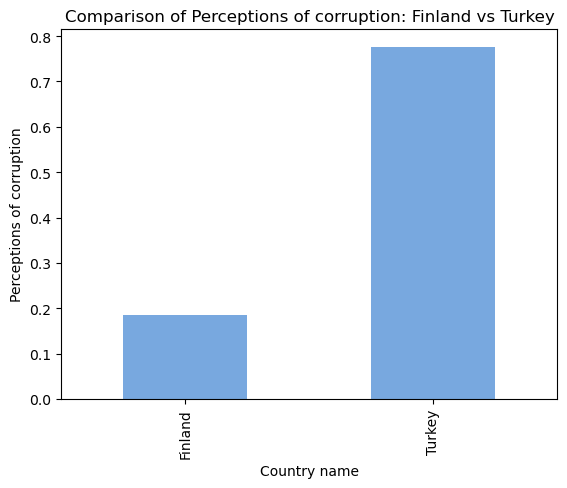

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

df_compare = pd.read_csv('C:/Users/susum/Documents/ds_happiness_proj/world-happiness-report-2021.csv', usecols=['Country name','Ladder score', 'Logged GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption'])

df_compare = df_compare[df_compare['Country name'].isin(['Finland', 'Turkey'])]

df_compare = df_compare.set_index('Country name')

# Create six different bar plots for each column
for column in df_compare.columns:
    df_compare[column].plot(kind='bar', color= '#78a8df')
    plt.title(f"Comparison of {column}: Finland vs Turkey")
    plt.ylabel(column)
    plt.show()

In [44]:
print(df[df['Country'] == 'Turkey']['Logged GDP per capita'])

103    10.24
Name: Logged GDP per capita, dtype: float64
